# Logistics Regression

In [20]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions 
from sklearn.decomposition import PCA

In [21]:
# Loading dataset
df = pd.read_csv(r'breast_cancer.csv')

df.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [22]:
# Previewing data real quick
df.head(10)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [23]:
# Defining x variables and y variable
x = df.iloc[:,0:9].values
y = df.iloc[:,9].values

In [24]:
# Splitting data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [25]:
# Initializing the model
lrmodel = LogisticRegression(solver='newton-cg')

In [26]:
# Fitting our training data on the model
lrmodel.fit(xtrain, ytrain)

LogisticRegression(solver='newton-cg')

In [27]:
# Checking intercept of our regression model
lrmodel.intercept_

array([-9.17796322])

In [28]:
# Checking the coefficients of our regression model
lrmodel.coef_

array([[0.3943735 , 0.14430425, 0.21099364, 0.19743802, 0.22348085,
        0.46479598, 0.31518682, 0.24472243, 0.18561027]])

In [29]:
# Predicting our testing data
lrprediction = lrmodel.predict(xtest)

In [30]:
# Checking accuracy of our model by comparing it with training data
trscore = lrmodel.score(xtrain, ytrain)

In [31]:
# Checking accuracy of our model by comparing it with testing data
lrscore = lrmodel.score(xtest, ytest)

In [32]:
# Our model has an accuracy of 95.6 %
print('Training Accuracy = ', trscore * 100, '%')
print('Testing Accuracy = ', lrscore * 100, '%')

Training Accuracy =  97.48953974895397 %
Testing Accuracy =  95.60975609756098 %


In [33]:
confusionmatrix = confusion_matrix(lrprediction, ytest)

<AxesSubplot:>

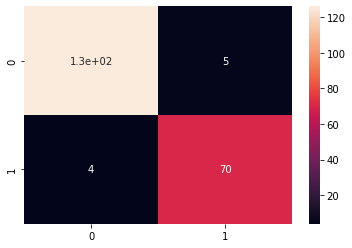

In [34]:
sns.heatmap(confusionmatrix, annot = True)

In [35]:
print(classification_report(lrprediction, ytest))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       131
           1       0.93      0.95      0.94        74

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [36]:
df

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

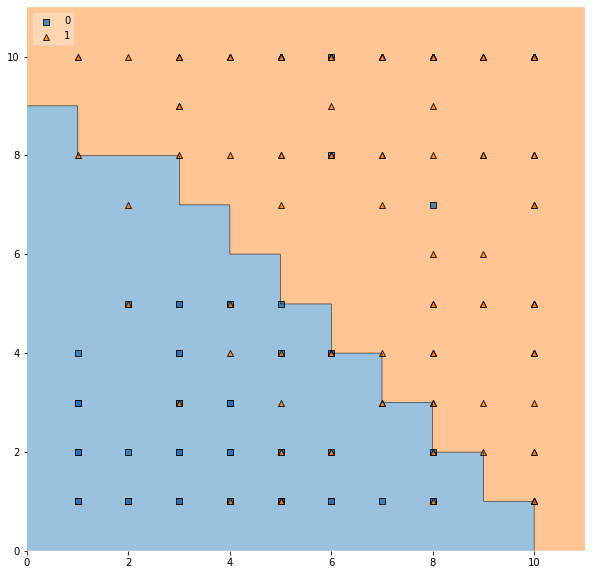

In [40]:
# Creating Decision Boundaries between features with high coefficient (clump thickness & bare nuclei)

dbx = df.iloc[:,[0,5]].values 
dby = df['diagnose'].values

dbxtrain, dbxtest, dbytrain, dbytest = train_test_split(dbx, dby, test_size=0.3, random_state=0)

lr = LogisticRegression(solver='newton-cg',random_state=0)

lr.fit(dbxtrain, dbytrain);

fig8, ax = plt.subplots(figsize=(10, 10))
fig8 = plot_decision_regions(dbxtrain, dbytrain, clf=lr, legend=2); 

plt.show